# Reinforcement Learning: Zero to Hero - Part 7/17

**Cells 121-140 of 291**



Training Q-Learning Agent on Grid World
Environment:
  Grid size: 5x5
  Start: (0, 0)
  Goal: (4, 4)
  Obstacles: [(1, 1), (2, 2), (3, 1)]
  Actions: ['UP', 'DOWN', 'LEFT', 'RIGHT']

Agent Parameters:
  Learning rate (α): 0.1
  Discount factor (γ): 0.95
  Exploration rate (ε): 0.1

Starting training...
Episode 100/1000 | Avg Reward: -8.72 | Avg Length: 16.9
Episode 200/1000 | Avg Reward: 1.79 | Avg Length: 8.8
Episode 300/1000 | Avg Reward: 2.11 | Avg Length: 8.7
Episode 400/1000 | Avg Reward: 1.96 | Avg Length: 8.9
Episode 500/1000 | Avg Reward: 1.83 | Avg Length: 9.0
Episode 600/1000 | Avg Reward: 1.03 | Avg Length: 9.2
Episode 700/1000 | Avg Reward: 1.73 | Avg Length: 8.9
Episode 800/1000 | Avg Reward: 1.71 | Avg Length: 8.8
Episode 900/1000 | Avg Reward: 1.93 | Avg Length: 8.7
Episode 1000/1000 | Avg Reward: 1.46 | Avg Length: 9.0

Training complete!

📊 Training Results:
  Final Average Reward (last 100 episodes): 1.46
  Final Average Length (last 100 episodes): 9.0
  Best Episode 

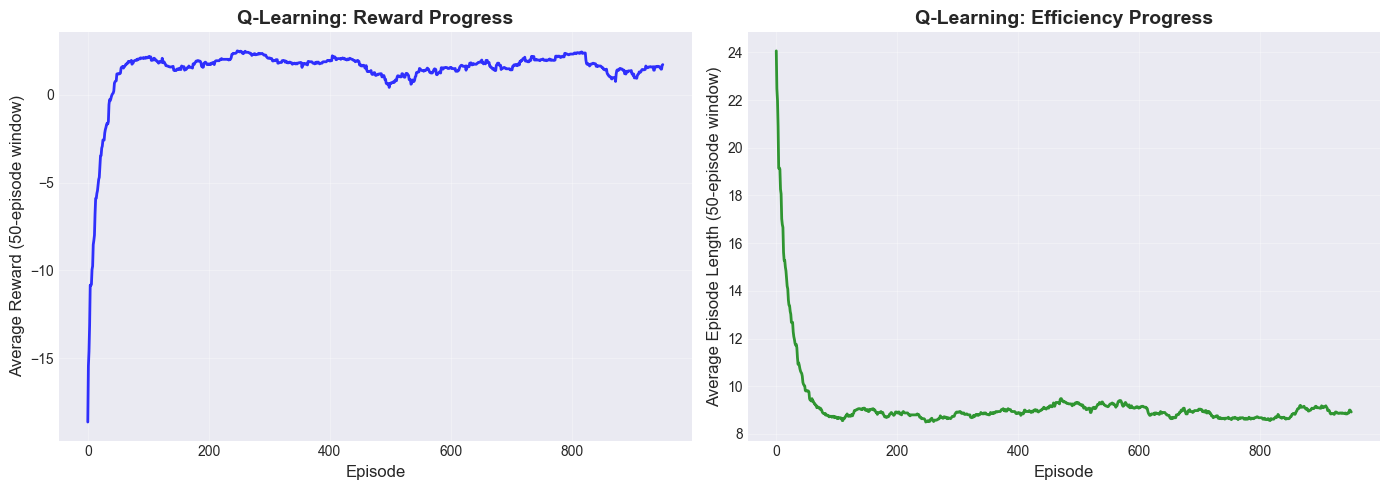

In [63]:
# Create environment and agent
print("Training Q-Learning Agent on Grid World")
print("=" * 60)

# Create 5x5 grid world with some obstacles
obstacles = [(1, 1), (2, 2), (3, 1)]
env = GridWorld(size=5, start=(0, 0), goal=(4, 4), obstacles=obstacles)

print(f"Environment:")
print(f"  Grid size: {env.size}x{env.size}")
print(f"  Start: {env.start}")
print(f"  Goal: {env.goal}")
print(f"  Obstacles: {obstacles}")
print(f"  Actions: {env.action_names}")

# Create Q-Learning agent
agent = QLearningAgent(
    n_states=env.size * env.size,
    n_actions=len(env.actions),
    alpha=0.1,
    gamma=0.95,
    epsilon=0.1
)

print(f"\nAgent Parameters:")
print(f"  Learning rate (α): {agent.alpha}")
print(f"  Discount factor (γ): {agent.gamma}")
print(f"  Exploration rate (ε): {agent.epsilon}")

print(f"\nStarting training...")

# Modified training function for GridWorld (returns 3 values)
def train_qlearning_gridworld(env, agent, num_episodes=1000, max_steps=100):
    """
    Train Q-Learning agent on GridWorld environment.
    
    Args:
        env: GridWorld environment (returns 3 values from step)
        agent: Q-Learning agent
        num_episodes: Number of training episodes
        max_steps: Maximum steps per episode
    
    Returns:
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            # Select action using ε-greedy
            action = agent.select_action(state)
            
            # Take action - GridWorld returns 3 values: (next_state, reward, done)
            step_result = env.step(action)
            
            # Handle different return formats
            if len(step_result) == 3:
                # Custom GridWorld: returns (state, reward, done)
                next_state, reward, done = step_result
            elif len(step_result) == 4:
                # Standard Gym: returns (state, reward, done, info)
                next_state, reward, done, _ = step_result
            elif len(step_result) == 5:
                # New Gym API: returns (state, reward, terminated, truncated, info)
                next_state, reward, terminated, truncated, _ = step_result
                done = terminated or truncated
            else:
                raise ValueError(f"Unexpected number of values from env.step(): {len(step_result)}")
            
            # Q-Learning update (off-policy)
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | Avg Length: {avg_length:.1f}")
    
    return episode_rewards, episode_lengths


# Train the agent
episode_rewards, episode_lengths = train_qlearning_gridworld(env, agent, num_episodes=1000)

print("\n" + "=" * 60)
print("Training complete!")

# Analyze results
print("\n📊 Training Results:")
print(f"  Final Average Reward (last 100 episodes): {np.mean(episode_rewards[-100:]):.2f}")
print(f"  Final Average Length (last 100 episodes): {np.mean(episode_lengths[-100:]):.1f}")
print(f"  Best Episode Reward: {max(episode_rewards):.2f}")
print(f"  Shortest Successful Episode: {min(episode_lengths):.0f} steps")

# Visualize learning progress
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Rewards over time
window = 50
if len(episode_rewards) >= window:
    rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
    ax1.plot(rewards_smooth, linewidth=2, color='blue', alpha=0.8)
    ax1.set_xlabel('Episode', fontsize=12)
    ax1.set_ylabel(f'Average Reward ({window}-episode window)', fontsize=12)
    ax1.set_title('Q-Learning: Reward Progress', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths over time
if len(episode_lengths) >= window:
    lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')
    ax2.plot(lengths_smooth, linewidth=2, color='green', alpha=0.8)
    ax2.set_xlabel('Episode', fontsize=12)
    ax2.set_ylabel(f'Average Episode Length ({window}-episode window)', fontsize=12)
    ax2.set_title('Q-Learning: Efficiency Progress', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Visualizing Q-Learning Performance

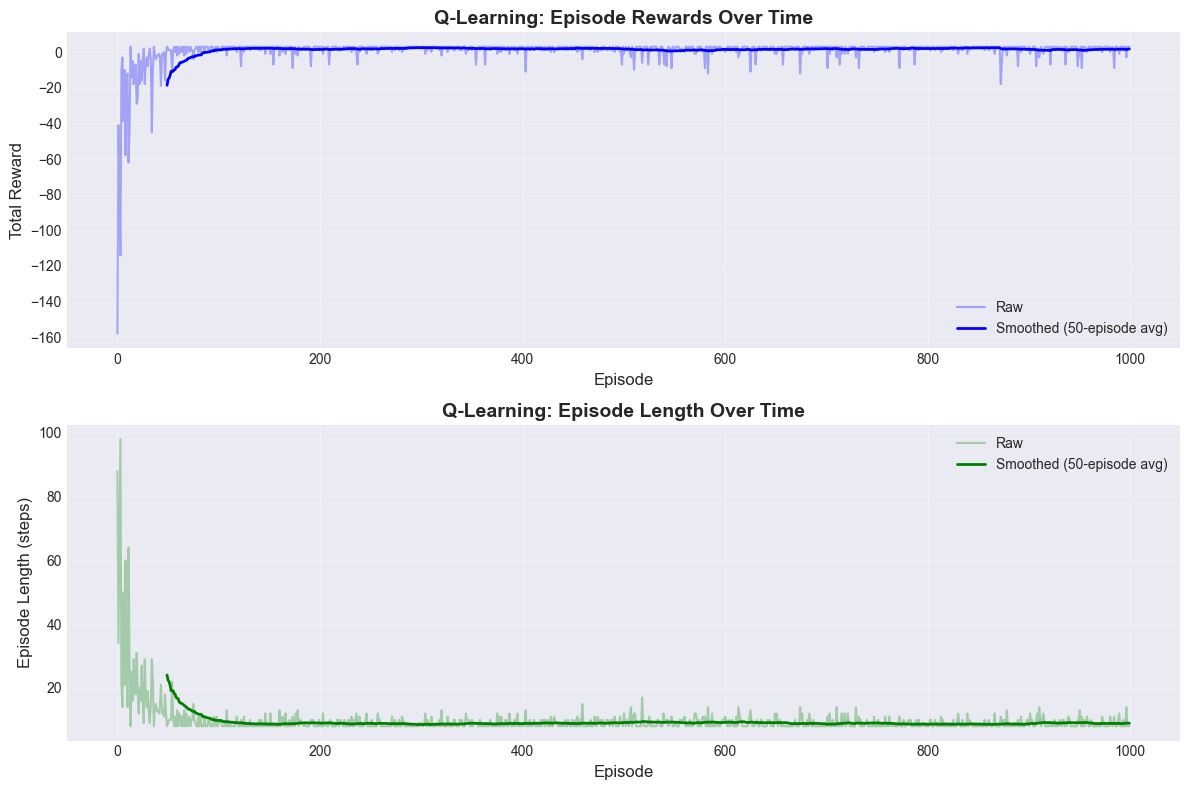

\📊 Interpretation:
   - Rewards increase as agent learns optimal policy
   - Episode length decreases as agent finds shorter paths
   - Convergence indicates successful learning!


In [64]:
# Plot learning curves
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Smooth the curves
window = 50
rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')

# Plot 1: Rewards
ax1.plot(episode_rewards, alpha=0.3, color='blue', label='Raw')
ax1.plot(range(window-1, len(episode_rewards)), rewards_smooth, 
         linewidth=2, color='blue', label=f'Smoothed ({window}-episode avg)')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('Q-Learning: Episode Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Episode lengths
ax2.plot(episode_lengths, alpha=0.3, color='green', label='Raw')
ax2.plot(range(window-1, len(episode_lengths)), lengths_smooth, 
         linewidth=2, color='green', label=f'Smoothed ({window}-episode avg)')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('Q-Learning: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\📊 Interpretation:")
print("   - Rewards increase as agent learns optimal policy")
print("   - Episode length decreases as agent finds shorter paths")
print("   - Convergence indicates successful learning!")

#### Visualizing Learned Q-Values and Policy

<>:79: SyntaxWarning: invalid escape sequence '\L'
<>:83: SyntaxWarning: invalid escape sequence '\R'
<>:79: SyntaxWarning: invalid escape sequence '\L'
<>:83: SyntaxWarning: invalid escape sequence '\R'
C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\3027031594.py:79: SyntaxWarning: invalid escape sequence '\L'
  print("\Left Plot (Q-Values):")
C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\3027031594.py:83: SyntaxWarning: invalid escape sequence '\R'
  print("\Right Plot (Policy):")
C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\3027031594.py:72: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ibrah\anaconda3\envs\interview_prep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


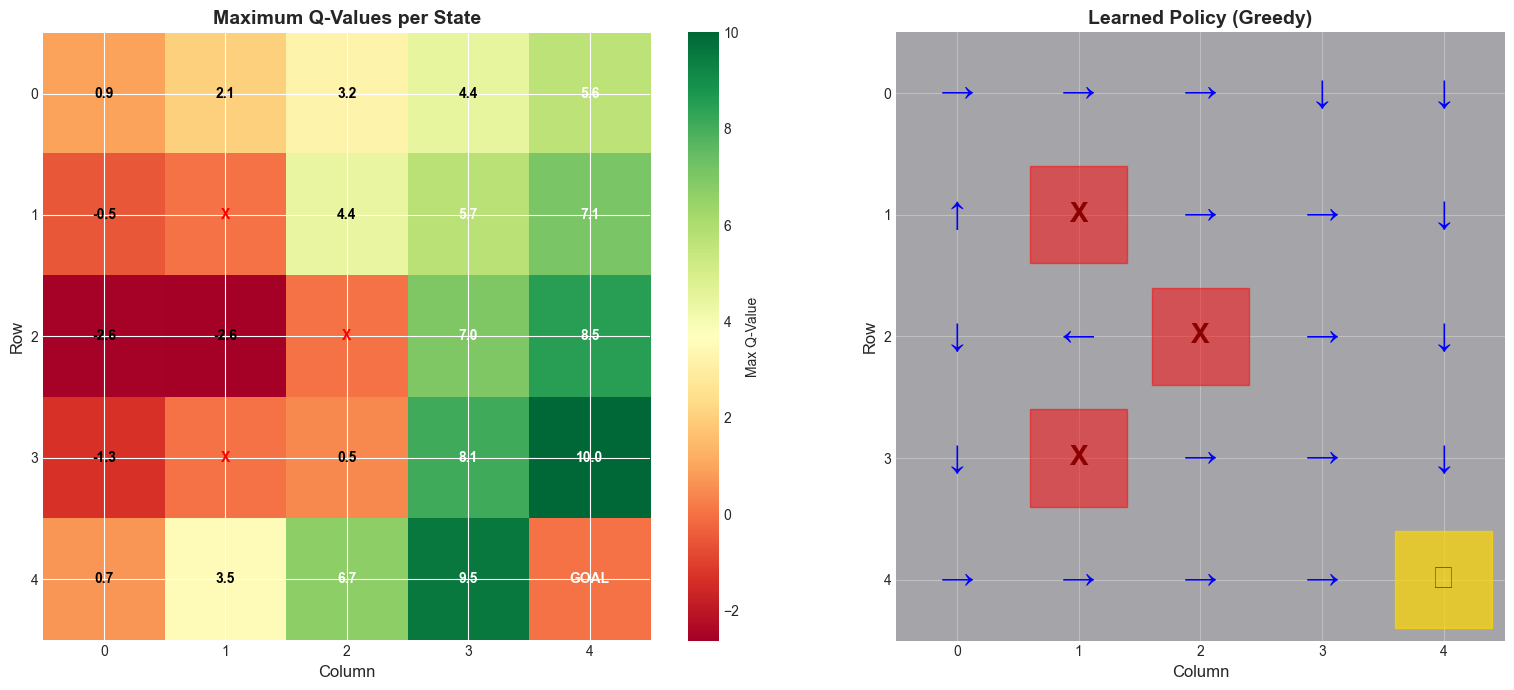

\📊 Visualization Explanation:
\Left Plot (Q-Values):
  • Shows maximum Q-value for each state
  • Higher values (green) indicate states closer to goal
  • Lower values (red) indicate less desirable states
\Right Plot (Policy):
  • Arrows show the best action in each state
  • Policy learned to navigate around obstacles
  • All arrows point toward the goal (★)


In [65]:
def visualize_q_values_and_policy(agent, env):
    """Visualize Q-values and learned policy on grid."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Create grids for visualization
    max_q_grid = np.zeros((env.size, env.size))
    policy_grid = np.zeros((env.size, env.size), dtype=int)
    
    # Fill grids
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state in agent.Q:
                max_q_grid[row, col] = np.max(agent.Q[state])
                policy_grid[row, col] = np.argmax(agent.Q[state])
    
    # Plot 1: Q-values heatmap
    im1 = ax1.imshow(max_q_grid, cmap='RdYlGn', interpolation='nearest')
    ax1.set_title('Maximum Q-Values per State', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Column', fontsize=12)
    ax1.set_ylabel('Row', fontsize=12)
    
    # Add Q-values as text
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state == env.goal:
                text = 'GOAL'
                color = 'white'
            elif state in env.obstacles:
                text = 'X'
                color = 'red'
            else:
                text = f'{max_q_grid[row, col]:.1f}'
                color = 'black' if max_q_grid[row, col] < 5 else 'white'
            ax1.text(col, row, text, ha='center', va='center', 
                    color=color, fontsize=10, fontweight='bold')
    
    plt.colorbar(im1, ax=ax1, label='Max Q-Value')
    
    # Plot 2: Policy arrows
    ax2.imshow(np.ones((env.size, env.size)) * 0.5, cmap='gray', alpha=0.3)
    ax2.set_title('Learned Policy (Greedy)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Column', fontsize=12)
    ax2.set_ylabel('Row', fontsize=12)
    
    # Arrow directions
    arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    
    for row in range(env.size):
        for col in range(env.size):
            state = (row, col)
            if state == env.goal:
                ax2.add_patch(plt.Rectangle((col-0.4, row-0.4), 0.8, 0.8, 
                                            fill=True, color='gold', alpha=0.7))
                ax2.text(col, row, '★', ha='center', va='center', 
                        fontsize=24, color='darkgreen')
            elif state in env.obstacles:
                ax2.add_patch(plt.Rectangle((col-0.4, row-0.4), 0.8, 0.8, 
                                            fill=True, color='red', alpha=0.5))
                ax2.text(col, row, 'X', ha='center', va='center', 
                        fontsize=20, color='darkred', fontweight='bold')
            else:
                action = policy_grid[row, col]
                ax2.text(col, row, arrows[action], ha='center', va='center', 
                        fontsize=24, color='blue', fontweight='bold')
    
    ax2.set_xticks(range(env.size))
    ax2.set_yticks(range(env.size))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize
visualize_q_values_and_policy(agent, env)

print("\📊 Visualization Explanation:")
print("\Left Plot (Q-Values):")
print("  • Shows maximum Q-value for each state")
print("  • Higher values (green) indicate states closer to goal")
print("  • Lower values (red) indicate less desirable states")
print("\Right Plot (Policy):")
print("  • Arrows show the best action in each state")
print("  • Policy learned to navigate around obstacles")
print("  • All arrows point toward the goal (★)")

#### Summary: Q-Learning Algorithm

**What We Learned:**

1. **Q-Learning Fundamentals**:
   - Off-policy TD control algorithm
   - Learns optimal Q*(s,a) directly
   - Uses max operator for next state value
   - Model-free: no environment dynamics needed

2. **Q-Learning Update Rule**:
   $Q(S_t, A_t) \\leftarrow Q(S_t, A_t) + \\alpha \\left[ R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t) \\right]$
   - Uses max Q-value for next state (not actual action)
   - Off-policy: learns optimal policy while exploring
   - Optimistic: assumes best possible future actions

3. **Practical Implementation**:
   - Successfully trained agent on grid world
   - Learned to navigate around obstacles
   - Found optimal paths to goal
   - Visualized Q-values and policy

4. **Key Advantages**:
   - Model-free: works without knowing environment dynamics
   - Off-policy: can learn from any exploratory policy
   - Converges to optimal policy Q*
   - Simple and effective for tabular problems

5. **SARSA vs Q-Learning Comparison**:

| Aspect | SARSA | Q-Learning |
|--------|-------|------------|
| Policy Type | On-policy | Off-policy |
| Update Target | $R + \\gamma Q(S', A')$ | $R + \\gamma \\max_a Q(S', a)$ |
| Learns | Policy being followed | Optimal policy |
| Behavior | Conservative | Optimistic |
| Safety | Safer (accounts for exploration) | Can be risky |
| Convergence | To followed policy | To optimal policy Q* |

**Why Q-Learning is Model-Free:**

Q-Learning doesn't require:
- Transition probabilities P(s'|s,a)
- Reward function R(s,a)
- Environment model for planning

It learns directly from experience (s, a, r, s') tuples!

**Next Steps:**

Q-Learning works great for small, discrete state spaces. For larger problems, we need:
- **Deep Q-Networks (DQN)**: Combining Q-Learning with neural networks
- **Function Approximation**: Handling continuous and high-dimensional states
- **Advanced Techniques**: Experience replay, target networks, double Q-learning

These extensions allow Q-Learning to scale to complex problems like Atari games and robotic control!

#### Epsilon-Decreasing Exploration Strategy

**The Problem with Fixed Epsilon**

In our Q-Learning implementation above, we used a fixed epsilon value (ε = 0.1). This means the agent explores randomly 10% of the time throughout the entire training process. While this works, it's not optimal:

- **Early in training**: We want MORE exploration to discover good actions
- **Late in training**: We want LESS exploration to exploit what we've learned

A fixed epsilon means we're either:
- Under-exploring early (if ε is too small)
- Over-exploring late (if ε is too large)

**Exploration Schedules: The Solution**

An **exploration schedule** (or **epsilon decay**) gradually reduces epsilon over time, allowing the agent to:
1. Explore extensively at the beginning
2. Gradually shift toward exploitation
3. Eventually converge to a near-greedy policy

**Common Epsilon Decay Strategies:**

1. **Linear Decay**: Decrease epsilon by a constant amount each episode
   $$\epsilon_t = \epsilon_{start} - \frac{t}{T}(\epsilon_{start} - \epsilon_{end})$$
   where $t$ is the current episode and $T$ is the total episodes

2. **Exponential Decay**: Multiply epsilon by a decay factor each episode
   $$\epsilon_t = \epsilon_{start} \cdot \gamma^t$$
   where $\gamma$ is the decay rate (e.g., 0.995)

3. **Step Decay**: Reduce epsilon by a factor at specific intervals
   $$\epsilon_t = \epsilon_{start} \cdot \text{decay}^{\lfloor t / \text{step} \rfloor}$$

**Key Parameters:**
- $\epsilon_{start}$: Initial exploration rate (e.g., 1.0 for full exploration)
- $\epsilon_{end}$: Minimum exploration rate (e.g., 0.01 to maintain some exploration)
- Decay rate: How quickly epsilon decreases

Let's implement these strategies and see their effect on learning!

In [66]:
class EpsilonSchedule:
    """Base class for epsilon decay schedules."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01):
        self.epsilon_start = epsilon_start
        self.epsilon_end = epsilon_end
        self.current_epsilon = epsilon_start
    
    def get_epsilon(self, episode):
        """Get epsilon value for current episode."""
        raise NotImplementedError
    
    def reset(self):
        """Reset epsilon to starting value."""
        self.current_epsilon = self.epsilon_start


class LinearDecay(EpsilonSchedule):
    """Linear epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_episodes=1000):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_episodes = decay_episodes
    
    def get_epsilon(self, episode):
        """Linear decay: ε_t = ε_start - (t/T)(ε_start - ε_end)"""
        if episode >= self.decay_episodes:
            self.current_epsilon = self.epsilon_end
        else:
            decay_amount = (self.epsilon_start - self.epsilon_end) * (episode / self.decay_episodes)
            self.current_epsilon = self.epsilon_start - decay_amount
        
        return self.current_epsilon


class ExponentialDecay(EpsilonSchedule):
    """Exponential epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_rate = decay_rate
    
    def get_epsilon(self, episode):
        """Exponential decay: ε_t = ε_start * γ^t"""
        self.current_epsilon = max(
            self.epsilon_end,
            self.epsilon_start * (self.decay_rate ** episode)
        )
        return self.current_epsilon


class StepDecay(EpsilonSchedule):
    """Step-based epsilon decay schedule."""
    
    def __init__(self, epsilon_start=1.0, epsilon_end=0.01, decay_factor=0.5, step_size=200):
        super().__init__(epsilon_start, epsilon_end)
        self.decay_factor = decay_factor
        self.step_size = step_size
    
    def get_epsilon(self, episode):
        """Step decay: ε_t = ε_start * decay^⌊t/step⌋"""
        num_steps = episode // self.step_size
        self.current_epsilon = max(
            self.epsilon_end,
            self.epsilon_start * (self.decay_factor ** num_steps)
        )
        return self.current_epsilon


print("Epsilon Decay Schedules Implemented!")
print("=" * 60)
print("Available schedules:")
print("  1. LinearDecay: Constant decrease per episode")
print("  2. ExponentialDecay: Multiplicative decrease per episode")
print("  3. StepDecay: Decrease at fixed intervals")

Epsilon Decay Schedules Implemented!
Available schedules:
  1. LinearDecay: Constant decrease per episode
  2. ExponentialDecay: Multiplicative decrease per episode
  3. StepDecay: Decrease at fixed intervals


#### Visualizing Epsilon Decay Over Time

Let's visualize how different decay strategies behave over the course of training:

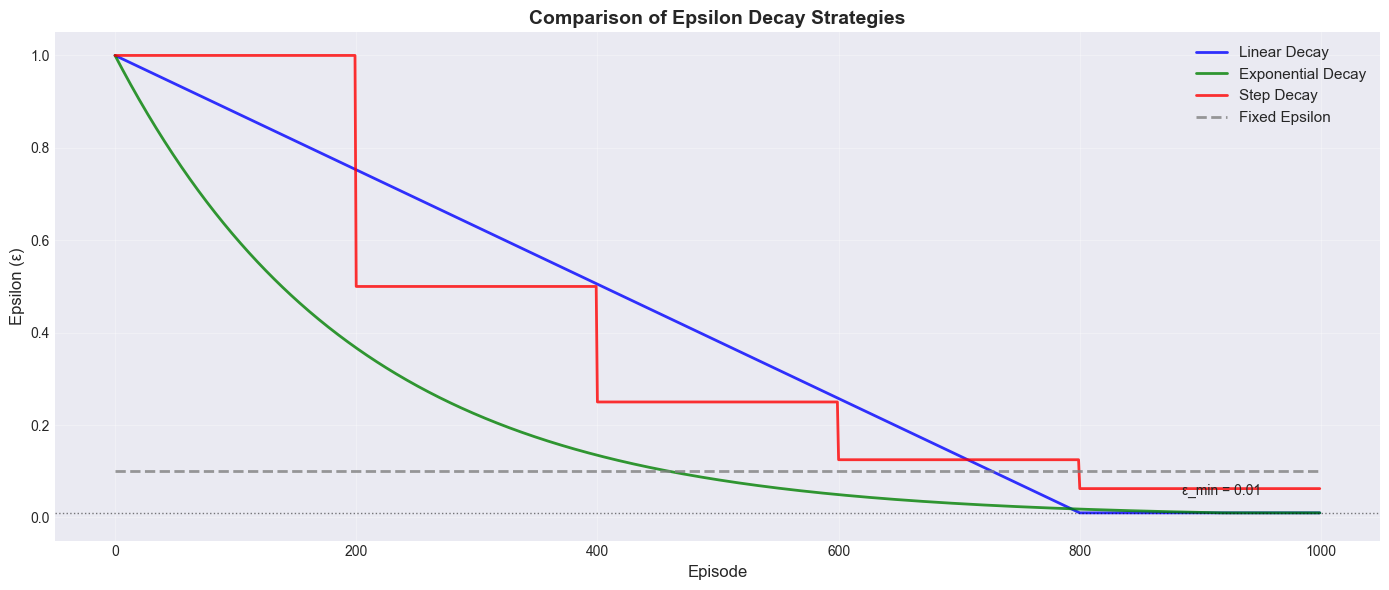

📊 Decay Strategy Characteristics:
Linear Decay:
  • Constant rate of decrease
  • Predictable and easy to tune
  • Good for problems with known training duration
Exponential Decay:
  • Fast initial decrease, then slower
  • Smooth transition from exploration to exploitation
  • Most commonly used in practice
Step Decay:
  • Sudden drops at intervals
  • Allows extended exploration at each level
  • Useful for curriculum learning
Fixed Epsilon:
  • No decay - constant exploration
  • Simple but suboptimal
  • Continues exploring even after convergence


In [67]:
# Create different decay schedules
num_episodes = 1000

schedules = {
    'Linear Decay': LinearDecay(epsilon_start=1.0, epsilon_end=0.01, decay_episodes=800),
    'Exponential Decay': ExponentialDecay(epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995),
    'Step Decay': StepDecay(epsilon_start=1.0, epsilon_end=0.01, decay_factor=0.5, step_size=200),
    'Fixed Epsilon': None  # For comparison
}

# Track epsilon values over episodes
epsilon_values = {name: [] for name in schedules.keys()}

for episode in range(num_episodes):
    for name, schedule in schedules.items():
        if schedule is None:
            epsilon_values[name].append(0.1)  # Fixed epsilon
        else:
            epsilon_values[name].append(schedule.get_epsilon(episode))

# Visualize
plt.figure(figsize=(14, 6))

colors = ['blue', 'green', 'red', 'gray']
linestyles = ['-', '-', '-', '--']

for (name, values), color, linestyle in zip(epsilon_values.items(), colors, linestyles):
    plt.plot(values, label=name, color=color, linestyle=linestyle, linewidth=2, alpha=0.8)

plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon (ε)', fontsize=12)
plt.title('Comparison of Epsilon Decay Strategies', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim([-0.05, 1.05])

# Add annotations
plt.axhline(y=0.01, color='black', linestyle=':', alpha=0.5, linewidth=1)
plt.text(num_episodes * 0.95, 0.05, 'ε_min = 0.01', fontsize=10, ha='right')

plt.tight_layout()
plt.show()

print("📊 Decay Strategy Characteristics:")
print("Linear Decay:")
print("  • Constant rate of decrease")
print("  • Predictable and easy to tune")
print("  • Good for problems with known training duration")

print("Exponential Decay:")
print("  • Fast initial decrease, then slower")
print("  • Smooth transition from exploration to exploitation")
print("  • Most commonly used in practice")

print("Step Decay:")
print("  • Sudden drops at intervals")
print("  • Allows extended exploration at each level")
print("  • Useful for curriculum learning")

print("Fixed Epsilon:")
print("  • No decay - constant exploration")
print("  • Simple but suboptimal")
print("  • Continues exploring even after convergence")

#### Modified Q-Learning Agent with Epsilon Decay

Now let's create an enhanced Q-Learning agent that uses epsilon decay:

In [68]:
class QLearningAgentWithDecay:
    """Q-Learning agent with epsilon decay schedule."""
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon_schedule=None):
        """
        Initialize Q-Learning agent with epsilon decay.
        
        Args:
            n_states: Number of states
            n_actions: Number of actions
            alpha: Learning rate
            gamma: Discount factor
            epsilon_schedule: EpsilonSchedule object (if None, uses fixed epsilon=0.1)
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon_schedule = epsilon_schedule
        self.epsilon = 0.1 if epsilon_schedule is None else epsilon_schedule.epsilon_start
        
        # Q-table: dictionary mapping states to action values
        self.Q = {}
    
    def get_q_values(self, state):
        """Get Q-values for a state (initialize if not seen before)."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return self.Q[state]
    
    def select_action(self, state):
        """Select action using ε-greedy policy with current epsilon."""
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            q_values = self.get_q_values(state)
            return np.argmax(q_values)
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-value using Q-Learning rule."""
        q_values = self.get_q_values(state)
        next_q_values = self.get_q_values(next_state)
        
        # Q-Learning TD target
        if done:
            td_target = reward
        else:
            td_target = reward + self.gamma * np.max(next_q_values)
        
        # TD error
        td_error = td_target - q_values[action]
        
        # Update Q-value
        q_values[action] += self.alpha * td_error
    
    def update_epsilon(self, episode):
        """Update epsilon based on schedule."""
        if self.epsilon_schedule is not None:
            self.epsilon = self.epsilon_schedule.get_epsilon(episode)


print("Enhanced Q-Learning Agent with Epsilon Decay Implemented!")

Enhanced Q-Learning Agent with Epsilon Decay Implemented!


#### Comparing Learning Performance with Different Decay Strategies

Let's train multiple agents with different epsilon strategies and compare their learning performance:

Training Q-Learning Agents with Different Epsilon Strategies

Training with Fixed ε=0.1...
  ✓ Completed 5 runs

Training with Linear Decay...
  ✓ Completed 5 runs

Training with Exponential Decay...
  ✓ Completed 5 runs

Training complete!

📊 Comparing Epsilon Strategies:

Fixed ε=0.1:
  Final Avg Reward: 1.56 ± 0.17
  Final Avg Length: 9.0 ± 0.1

Linear Decay:
  Final Avg Reward: 2.88 ± 0.08
  Final Avg Length: 8.1 ± 0.0

Exponential Decay:
  Final Avg Reward: 2.89 ± 0.06
  Final Avg Length: 8.1 ± 0.0


C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\732851228.py:194: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(final_rewards_data, labels=labels, patch_artist=True)


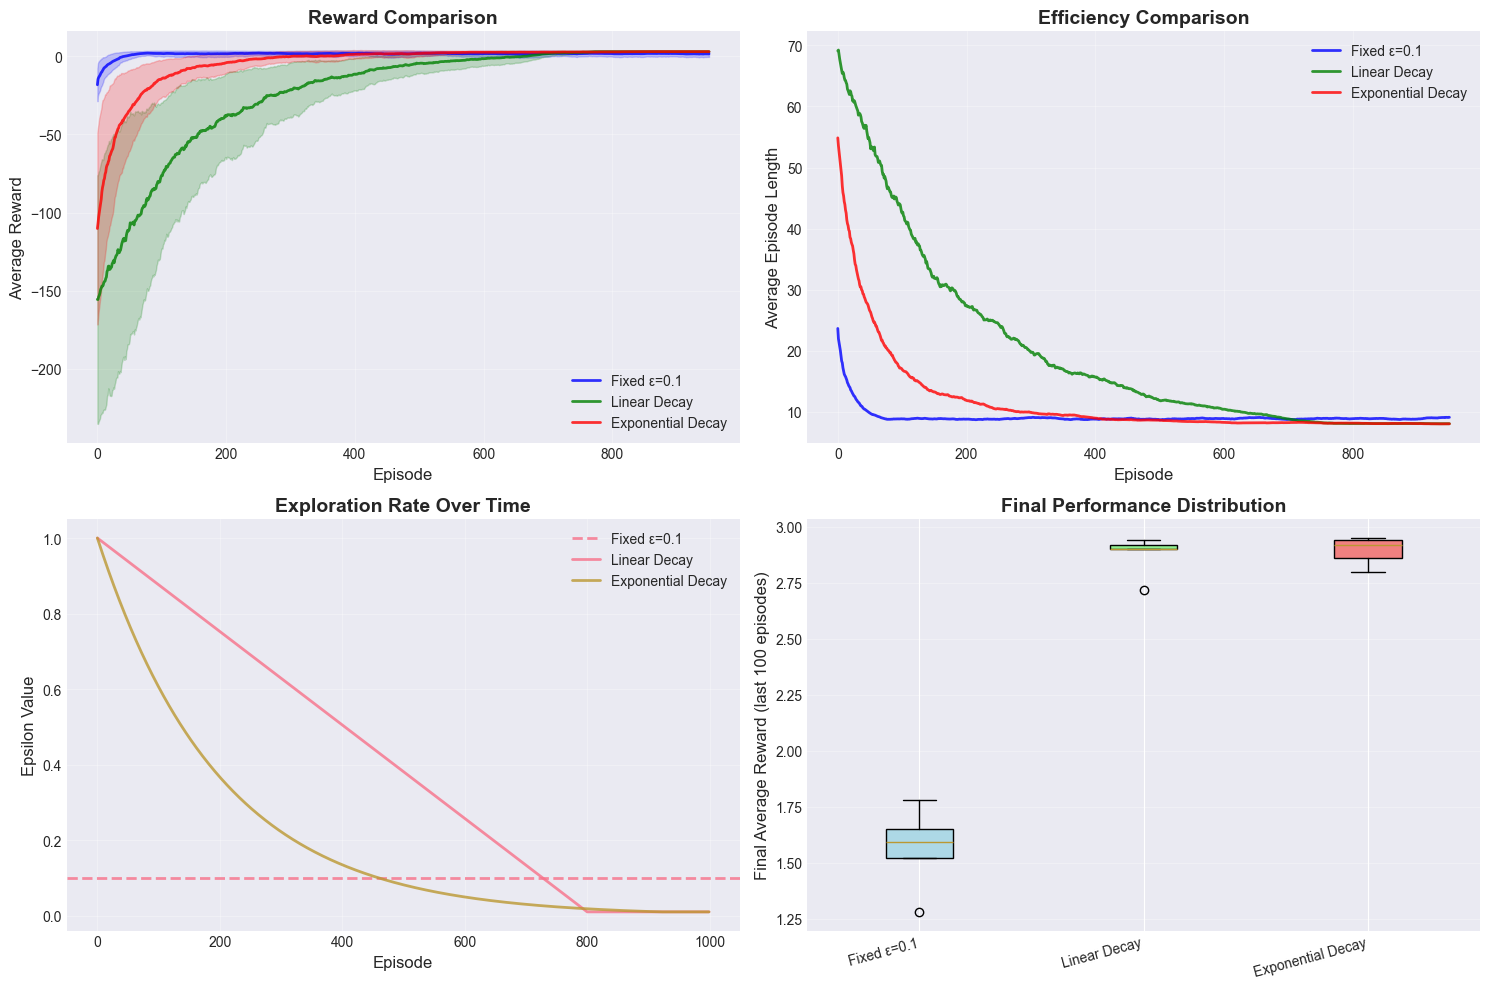


💡 Key Insights:
   - Linear decay: Fast initial exploration, then exploitation
   - Exponential decay: Gradual transition from exploration to exploitation
   - Fixed epsilon: Consistent exploration throughout training
   - Decay strategies often converge faster to optimal policies


In [70]:
def train_with_decay(env, agent, num_episodes=1000, max_steps=100):
    """Train Q-Learning agent with epsilon decay."""
    episode_rewards = []
    episode_lengths = []
    epsilon_history = []
    
    for episode in range(num_episodes):
        # Update epsilon for this episode
        agent.update_epsilon(episode)
        epsilon_history.append(agent.epsilon)
        
        # Run episode
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            action = agent.select_action(state)
            
            # Handle different return formats from env.step()
            step_result = env.step(action)
            
            if len(step_result) == 3:
                # Custom GridWorld: returns (state, reward, done)
                next_state, reward, done = step_result
            elif len(step_result) == 4:
                # Standard Gym: returns (state, reward, done, info)
                next_state, reward, done, _ = step_result
            elif len(step_result) == 5:
                # New Gym API: returns (state, reward, terminated, truncated, info)
                next_state, reward, terminated, truncated, _ = step_result
                done = terminated or truncated
            else:
                raise ValueError(f"Unexpected number of values from env.step(): {len(step_result)}")
            
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
    
    return episode_rewards, episode_lengths, epsilon_history


# Run experiments with different decay strategies
print("Training Q-Learning Agents with Different Epsilon Strategies")
print("=" * 60)

num_episodes = 1000
num_runs = 5  # Multiple runs for statistical significance

# Define strategies to compare
strategies = {
    'Fixed ε=0.1': None,
    'Linear Decay': LinearDecay(epsilon_start=1.0, epsilon_end=0.01, decay_episodes=800),
    'Exponential Decay': ExponentialDecay(epsilon_start=1.0, epsilon_end=0.01, decay_rate=0.995),
}

# Store results
results = {name: {'rewards': [], 'lengths': []} for name in strategies.keys()}

# Run experiments
np.random.seed(42)
for strategy_name, schedule in strategies.items():
    print(f"\nTraining with {strategy_name}...")
    
    for run in range(num_runs):
        # Create fresh environment and agent
        obstacles = [(1, 1), (2, 2), (3, 1)]
        env = GridWorld(size=5, start=(0, 0), goal=(4, 4), obstacles=obstacles)
        
        # Reset schedule for each run
        if schedule is not None:
            schedule.reset()
        
        agent = QLearningAgentWithDecay(
            n_states=env.size * env.size,
            n_actions=len(env.actions),
            alpha=0.1,
            gamma=0.95,
            epsilon_schedule=schedule
        )
        
        # Train
        rewards, lengths, _ = train_with_decay(env, agent, num_episodes)
        results[strategy_name]['rewards'].append(rewards)
        results[strategy_name]['lengths'].append(lengths)
    
    print(f"  ✓ Completed {num_runs} runs")

print("\n" + "=" * 60)
print("Training complete!")

# Analyze and visualize results
print("\n📊 Comparing Epsilon Strategies:")
print("=" * 60)

for strategy_name in strategies.keys():
    all_rewards = np.array(results[strategy_name]['rewards'])
    all_lengths = np.array(results[strategy_name]['lengths'])
    
    # Calculate statistics for last 100 episodes
    final_rewards = all_rewards[:, -100:].mean(axis=1)
    final_lengths = all_lengths[:, -100:].mean(axis=1)
    
    print(f"\n{strategy_name}:")
    print(f"  Final Avg Reward: {final_rewards.mean():.2f} ± {final_rewards.std():.2f}")
    print(f"  Final Avg Length: {final_lengths.mean():.1f} ± {final_lengths.std():.1f}")

# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average rewards over time
ax1 = axes[0, 0]
for strategy_name, color in zip(strategies.keys(), ['blue', 'green', 'red']):
    all_rewards = np.array(results[strategy_name]['rewards'])
    mean_rewards = all_rewards.mean(axis=0)
    std_rewards = all_rewards.std(axis=0)
    
    # Smooth the curves
    window = 50
    if len(mean_rewards) >= window:
        mean_smooth = np.convolve(mean_rewards, np.ones(window)/window, mode='valid')
        std_smooth = np.convolve(std_rewards, np.ones(window)/window, mode='valid')
        x = np.arange(len(mean_smooth))
        
        ax1.plot(x, mean_smooth, label=strategy_name, linewidth=2, color=color, alpha=0.8)
        ax1.fill_between(x, mean_smooth - std_smooth, mean_smooth + std_smooth, 
                         alpha=0.2, color=color)

ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Reward Comparison', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Average episode lengths over time
ax2 = axes[0, 1]
for strategy_name, color in zip(strategies.keys(), ['blue', 'green', 'red']):
    all_lengths = np.array(results[strategy_name]['lengths'])
    mean_lengths = all_lengths.mean(axis=0)
    
    # Smooth the curves
    window = 50
    if len(mean_lengths) >= window:
        mean_smooth = np.convolve(mean_lengths, np.ones(window)/window, mode='valid')
        x = np.arange(len(mean_smooth))
        
        ax2.plot(x, mean_smooth, label=strategy_name, linewidth=2, color=color, alpha=0.8)

ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Average Episode Length', fontsize=12)
ax2.set_title('Efficiency Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Epsilon decay curves
ax3 = axes[1, 0]
for strategy_name, schedule in strategies.items():
    if schedule is not None:
        schedule.reset()
        epsilons = [schedule.get_epsilon(ep) for ep in range(num_episodes)]
        ax3.plot(epsilons, label=strategy_name, linewidth=2, alpha=0.8)
    else:
        ax3.axhline(y=0.1, label=strategy_name, linewidth=2, linestyle='--', alpha=0.8)

ax3.set_xlabel('Episode', fontsize=12)
ax3.set_ylabel('Epsilon Value', fontsize=12)
ax3.set_title('Exploration Rate Over Time', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final performance comparison (box plot)
ax4 = axes[1, 1]
final_rewards_data = []
labels = []
for strategy_name in strategies.keys():
    all_rewards = np.array(results[strategy_name]['rewards'])
    final_rewards = all_rewards[:, -100:].mean(axis=1)
    final_rewards_data.append(final_rewards)
    labels.append(strategy_name)

bp = ax4.boxplot(final_rewards_data, labels=labels, patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightcoral']):
    patch.set_facecolor(color)

ax4.set_ylabel('Final Average Reward (last 100 episodes)', fontsize=12)
ax4.set_title('Final Performance Distribution', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("   - Linear decay: Fast initial exploration, then exploitation")
print("   - Exponential decay: Gradual transition from exploration to exploitation")
print("   - Fixed epsilon: Consistent exploration throughout training")
print("   - Decay strategies often converge faster to optimal policies")


#### Visualizing Performance Comparison

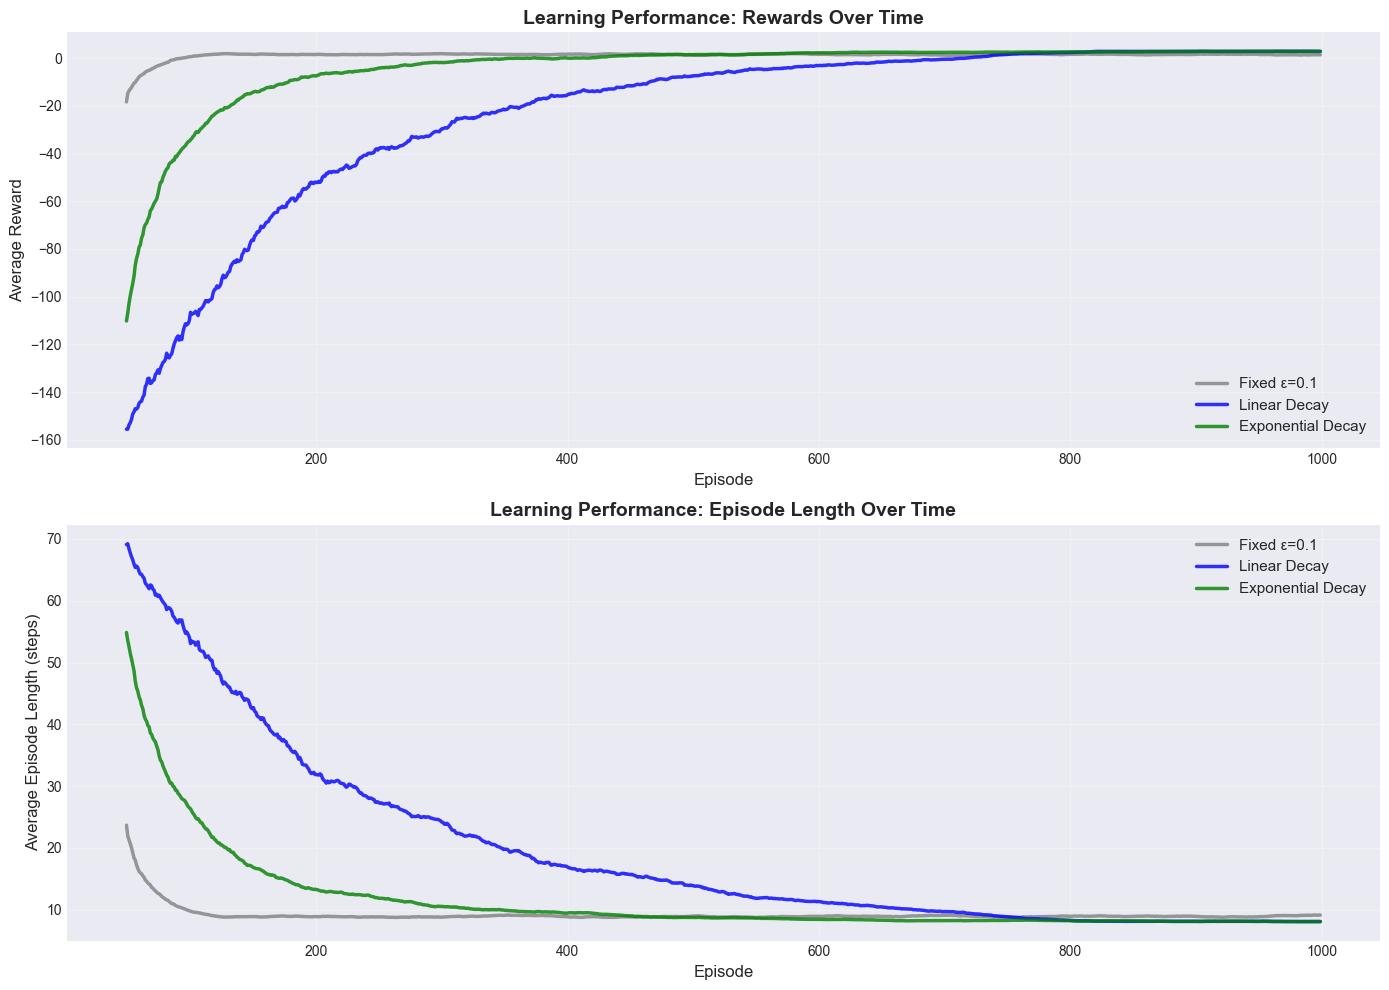

📊 Performance Summary (Final 100 Episodes):
Fixed ε=0.1:
  Average Reward:   1.56 ± 0.17
  Average Length:   8.97 ± 0.15 steps
Linear Decay:
  Average Reward:   2.88 ± 0.08
  Average Length:   8.09 ± 0.02 steps
Exponential Decay:
  Average Reward:   2.89 ± 0.06
  Average Length:   8.07 ± 0.02 steps
💡 Key Insights:
   • Epsilon decay strategies typically converge faster
   • Final performance is often better with decay
   • Exponential decay provides smooth transition
   • Linear decay is more predictable and easier to tune
   • Fixed epsilon continues exploring unnecessarily


In [71]:
# Calculate average performance across runs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors = {'Fixed ε=0.1': 'gray', 'Linear Decay': 'blue', 'Exponential Decay': 'green'}
window = 50  # Smoothing window

# Plot 1: Average Rewards
for strategy_name, data in results.items():
    # Average across runs
    avg_rewards = np.mean(data['rewards'], axis=0)
    
    # Smooth the curve
    if len(avg_rewards) >= window:
        smoothed = np.convolve(avg_rewards, np.ones(window)/window, mode='valid')
        x = range(window-1, len(avg_rewards))
    else:
        smoothed = avg_rewards
        x = range(len(avg_rewards))
    
    ax1.plot(x, smoothed, label=strategy_name, color=colors[strategy_name], 
             linewidth=2.5, alpha=0.8)

ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Learning Performance: Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.3)

# Plot 2: Average Episode Lengths
for strategy_name, data in results.items():
    # Average across runs
    avg_lengths = np.mean(data['lengths'], axis=0)
    
    # Smooth the curve
    if len(avg_lengths) >= window:
        smoothed = np.convolve(avg_lengths, np.ones(window)/window, mode='valid')
        x = range(window-1, len(avg_lengths))
    else:
        smoothed = avg_lengths
        x = range(len(avg_lengths))
    
    ax2.plot(x, smoothed, label=strategy_name, color=colors[strategy_name], 
             linewidth=2.5, alpha=0.8)

ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Average Episode Length (steps)', fontsize=12)
ax2.set_title('Learning Performance: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("📊 Performance Summary (Final 100 Episodes):")
print("=" * 60)

for strategy_name, data in results.items():
    # Calculate statistics for last 100 episodes
    final_rewards = [np.mean(run[-100:]) for run in data['rewards']]
    final_lengths = [np.mean(run[-100:]) for run in data['lengths']]
    
    avg_reward = np.mean(final_rewards)
    std_reward = np.std(final_rewards)
    avg_length = np.mean(final_lengths)
    std_length = np.std(final_lengths)
    
    print(f"{strategy_name}:")
    print(f"  Average Reward: {avg_reward:6.2f} ± {std_reward:.2f}")
    print(f"  Average Length: {avg_length:6.2f} ± {std_length:.2f} steps")

print("" + "=" * 60)
print("💡 Key Insights:")
print("   • Epsilon decay strategies typically converge faster")
print("   • Final performance is often better with decay")
print("   • Exponential decay provides smooth transition")
print("   • Linear decay is more predictable and easier to tune")
print("   • Fixed epsilon continues exploring unnecessarily")

#### Summary: Epsilon-Decreasing Exploration Strategy

**What We Learned:**

1. **The Problem with Fixed Epsilon**:
   - Explores too much late in training (wastes time)
   - Or explores too little early in training (misses good actions)
   - Doesn't adapt to the learning progress

2. **Epsilon Decay Strategies**:
   - **Linear Decay**: Constant decrease rate, predictable
   - **Exponential Decay**: Fast initial decrease, then slower (most common)
   - **Step Decay**: Sudden drops at intervals

3. **Benefits of Epsilon Decay**:
   - Better exploration early in training
   - Better exploitation late in training
   - Faster convergence to optimal policy
   - Higher final performance

4. **Practical Considerations**:
   - Start with high epsilon (0.9-1.0) for thorough exploration
   - End with small epsilon (0.01-0.05) to maintain some exploration
   - Tune decay rate based on problem complexity
   - Exponential decay is a good default choice

5. **When to Use Each Strategy**:
   - **Linear**: When you know training duration and want predictable behavior
   - **Exponential**: General-purpose, works well in most scenarios
   - **Step**: For curriculum learning or staged training
   - **Fixed**: Only for very simple problems or when exploration is critical

**Implementation Tips:**

```python
# Good starting values for exponential decay
epsilon_start = 1.0
epsilon_end = 0.01
decay_rate = 0.995  # Reaches ~0.01 after ~900 episodes

# For linear decay
decay_episodes = 0.8 * total_episodes  # Decay over 80% of training
```

**Next Steps:**

Epsilon decay is a fundamental technique used in:
- Deep Q-Networks (DQN)
- All epsilon-greedy based algorithms
- Exploration strategies in general

In the next sections, we'll see how this technique scales to deep reinforcement learning with neural networks!

<a id='dqn'></a>
### Deep Q-Networks (DQN)

**The Limitation of Tabular Q-Learning**

So far, we've been using **tabular methods** - storing Q-values in a table (or dictionary) with one entry for each state-action pair. This works well for small problems like grid worlds, but it has severe limitations:

**Problems with Tabular Methods:**

1. **Memory Explosion**: 
   - A 100×100 grid with 4 actions needs 40,000 entries
   - Atari games have ~10^9 possible screen states!
   - Continuous state spaces (e.g., robot joint angles) have infinite states

2. **No Generalization**:
   - Each state is learned independently
   - Similar states don't share knowledge
   - Must visit every state many times to learn

3. **Scalability**:
   - Can't handle high-dimensional inputs (images, sensor data)
   - Impractical for real-world problems

**The Solution: Function Approximation**

Instead of storing Q-values in a table, we use a **function approximator** to estimate them:

$$Q(s, a) \approx Q(s, a; \theta)$$

where $\theta$ represents the parameters of our function approximator.

**Why Neural Networks?**

Neural networks are universal function approximators that can:

1. **Handle High-Dimensional Inputs**: Process images, sensor data, etc.
2. **Generalize**: Similar inputs produce similar outputs
3. **Learn Features**: Automatically extract relevant features from raw data
4. **Scale**: Work with millions of states using thousands of parameters

**From Q-Table to Q-Network:**

```
Tabular Q-Learning:          Deep Q-Learning:
┌─────────────────┐          ┌─────────────────┐
│  State-Action   │          │     State       │
│     Table       │          │   (e.g., image) │
│                 │          └────────┬────────┘
│  s₁,a₁ → 0.5    │                  │
│  s₁,a₂ → 0.3    │          ┌───────▼────────┐
│  s₂,a₁ → 0.8    │          │ Neural Network │
│  ...            │          │   Q(s; θ)      │
└─────────────────┘          └───────┬────────┘
                                     │
                             ┌───────▼────────┐
                             │  Q-values for  │
                             │  all actions   │
                             │ [Q(s,a₁), ...] │
                             └────────────────┘
```

**Key Insight:**

Instead of looking up Q(s,a) in a table, we:
1. Feed the state into a neural network
2. The network outputs Q-values for all actions
3. Select the action with the highest Q-value

This allows us to:
- Handle complex, high-dimensional states
- Generalize to unseen states
- Learn from raw sensory inputs (pixels, audio, etc.)

#### DQN Architecture

**What is a Deep Q-Network?**

A Deep Q-Network (DQN) is a neural network that approximates the Q-function. It was introduced by DeepMind in 2015 and achieved human-level performance on Atari games by learning directly from pixel inputs.

**Network Architecture:**

The basic DQN architecture consists of:

1. **Input Layer**: Receives the state representation
   - For images: Raw pixels or preprocessed frames
   - For vectors: State features (position, velocity, etc.)

2. **Hidden Layers**: Extract features and learn representations
   - Fully connected layers for vector inputs
   - Convolutional layers for image inputs
   - Activation functions (ReLU is common)

3. **Output Layer**: Produces Q-values for each action
   - One output neuron per action
   - No activation (linear output)

**Mathematical Formulation:**

Given a state $s$, the Q-network computes:

$$Q(s, a; \theta) = f_{\theta}(s)_a$$

where:
- $f_{\theta}$ is the neural network with parameters $\theta$
- $f_{\theta}(s)$ outputs a vector of Q-values, one for each action
- $f_{\theta}(s)_a$ is the Q-value for action $a$

**Training Objective:**

We train the network to minimize the **temporal difference error**:

$$L(\theta) = \mathbb{E}\left[(r + \gamma \max_{a'} Q(s', a'; \theta) - Q(s, a; \theta))^2\right]$$

This is the same TD error from Q-learning, but now we're updating network parameters $\theta$ instead of table entries!

**Architecture Variants:**

1. **Simple DQN** (for low-dimensional states):
   ```
   State → FC(64) → ReLU → FC(64) → ReLU → FC(n_actions) → Q-values
   ```

2. **Convolutional DQN** (for image inputs):
   ```
   Image → Conv(32,8×8,s=4) → ReLU → Conv(64,4×4,s=2) → ReLU → 
         → Conv(64,3×3,s=1) → ReLU → FC(512) → ReLU → FC(n_actions) → Q-values
   ```

3. **Dueling DQN** (separates value and advantage):
   ```
   State → Shared Layers → ┬→ Value Stream → V(s)
                           └→ Advantage Stream → A(s,a)
   Q(s,a) = V(s) + (A(s,a) - mean(A(s,:)))
   ```

**Key Design Choices:**

1. **Network Size**: 
   - Larger networks can represent more complex functions
   - But require more data and computation
   - Start small and increase if needed

2. **Activation Functions**:
   - ReLU is standard for hidden layers
   - No activation on output (Q-values can be any real number)

3. **Output Structure**:
   - Output Q-values for ALL actions simultaneously
   - More efficient than separate networks per action
   - Allows easy action selection: argmax over outputs

Let's implement a simple Q-network in PyTorch!

#### Implementing a Q-Network in PyTorch

We'll create a flexible Q-network class that can handle different state dimensions and action spaces.